In [1]:
!pip install -Uqq duckduckgo_search
from fastai import *
from fastai.vision import *
from fastai.vision.all import *
from duckduckgo_search import DDGS

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 35.9 MB/s eta 0:00:00


In [2]:
def search_images(name , max_result = 200):
    with DDGS() as ddg:
      ims = ddg.images(name , max_results=max_result)

    return L(ims).itemgot("image")

In [3]:
from fastdownload import download_url
vijay = search_images(" actor vijay" , 1)
ajith = search_images(" actor ajith Kumar " , 1)
sk = search_images("actor siva karthikeyan" , 1)
vj_dest = "thalapathy.jpg"
ak_dest = "ak.jpg"
sk_dest = "sk.jpg"
download_url(vijay[0] , vj_dest  , show_progress=False)
download_url(ajith[0] , ak_dest  , show_progress=False)
download_url(sk[0] , sk_dest  , show_progress=False)


Path('sk.jpg')

In [4]:
path = Path("Actor")

searches = "actor vijay" , "actor ajith Kumar" , "actor siva karthikeyan"

for o in searches:
  l = o.replace(" ","")
  dest = (path/o)
  dest.mkdir(exist_ok = True , parents = True)
  download_images(dest , urls = search_images(o))
  resize_images(dest , max_size = 400 , dest= dest)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [5]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

8

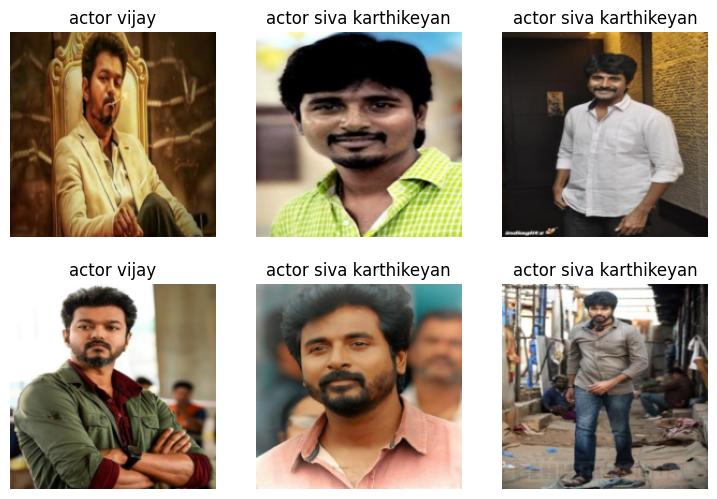

In [6]:
dls = DataBlock(
    blocks = (ImageBlock , CategoryBlock),
    get_items = get_image_files,
    get_y = parent_label,# is a function provided by fastai that simply gets the name of the folder a file is in. Because we put each of our bear images into folders based on the type of bear, this is going to give us the labels that we need.
    splitter = RandomSplitter(valid_pct = 0.2 , seed = 42),
    item_tfms=[Resize(192 , method = "squish")]
).dataloaders(path)

dls.show_batch(max_n=6)

In [7]:
vision = vision_learner(dls , resnet18 , metrics = error_rate)
vision.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 181MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,2.000668,1.419905,0.614458,00:02


epoch,train_loss,valid_loss,error_rate,time
0,1.395155,1.157696,0.493976,00:02
1,0.986158,1.088788,0.433735,00:01
2,0.746616,1.073998,0.421687,00:02


In [10]:
search = "ak.jpg" , "thalapathy.jpg" , "sk.jpg"
for i in search:
  pred,_,is_prob = vision.predict(PILImage.create(i))
  print(pred)
  print(max(is_prob))

actor ajith Kumar
tensor(0.9676)


actor vijay
tensor(0.9989)


actor siva karthikeyan
tensor(0.9942)
